In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

# input image dimensions
img_x, img_y = 28, 28

# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Scale pixel values from range 0..255 to 0..1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


/Users/h259832/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()
#Be sure to add padding="same" to get 50% reduction in size at each layer, else gets reduced more
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu', padding="same",
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [4]:
for layer in model.layers:
    print(layer.name, layer.output_shape)
    
print()
print(model.inputs)

conv2d_1 (None, 28, 28, 32)
max_pooling2d_1 (None, 14, 14, 32)
conv2d_2 (None, 14, 14, 64)
max_pooling2d_2 (None, 7, 7, 64)
flatten_1 (None, 3136)
dense_1 (None, 1000)
dense_2 (None, 10)

[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]


In [3]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [4]:
#dir(model)

In [9]:
print(model.name)
print(model.output_layers)

sequential_1


In [13]:

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.loss = []
        self.val_acc = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

history = AccuracyHistory()

epochs = 20
batch_size = 128
#model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch = None,  #None uses each training data image one time
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 677us/step - loss: 0.1520 - acc: 0.9534 - val_loss: 0.0391 - val_acc: 0.9871
Epoch 2/20
60000/60000 [==============================] - 40s 663us/step - loss: 0.0417 - acc: 0.9873 - val_loss: 0.0363 - val_acc: 0.9895
Epoch 3/20
60000/60000 [==============================] - 39s 648us/step - loss: 0.0264 - acc: 0.9917 - val_loss: 0.0320 - val_acc: 0.9903
Epoch 4/20
60000/60000 [==============================] - 40s 662us/step - loss: 0.0205 - acc: 0.9932 - val_loss: 0.0219 - val_acc: 0.9929
Epoch 5/20
60000/60000 [==============================] - 39s 643us/step - loss: 0.0139 - acc: 0.9959 - val_loss: 0.0260 - val_acc: 0.9924
Epoch 6/20
60000/60000 [==============================] - 39s 650us/step - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0286 - val_acc: 0.9908
Epoch 7/20
60000/60000 [==============================] - 40s 674us/step - loss: 0.0111 - acc: 0.9965 - val_loss: 0.

In [16]:
#model.save_weights('Keras_CNN_MNIST_demo_weights.h5')

In [14]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



10000/10000 [==============================] - 2s 236us/step
Test loss: 0.03241382947938996
Test accuracy: 0.9936


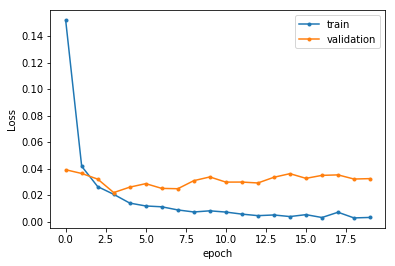

In [17]:
# summarize history for loss
plt.subplot(1,1,1)
plt.plot(history.loss, '.-')
plt.plot(history.val_loss, '.-')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#print(history.loss, history.val_loss)

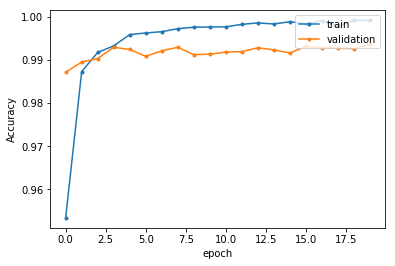

In [33]:
# summarize history for loss
plt.subplot(1,1,1)
plt.plot(history.acc, '.-')
plt.plot(history.val_acc, '.-')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
#print(history.acc, history.val_acc)

(28, 28)


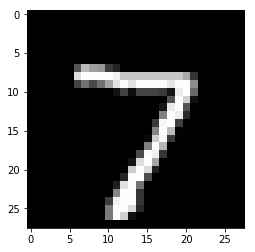

y= [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

[7 2 1 0 4 1 4 9 5 9]

0 7
1 2
2 1
3 0
4 4
5 1
6 4
7 9
8 5
9 9


In [21]:
input_image_index = 0
print(x_test[input_image_index,:,:,0].shape)

plt.imshow(x_test[input_image_index,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

print("y=", y_test[input_image_index])
print()

predictions = model.predict_classes(x_test[input_image_index:])[0:10]
print(predictions)
print()

for i, prediction in enumerate(predictions):
    print(i, prediction)


In [24]:
predictions = model.predict_proba(x_test[input_image_index:])[0:10]

for i, prediction in enumerate(predictions[0]):
    print(i, prediction)


0 5.0048744e-23
1 4.3840142e-18
2 8.497308e-19
3 9.498119e-17
4 2.4638001e-26
5 6.487372e-23
6 2.8155181e-27
7 1.0
8 1.2968893e-21
9 1.3040847e-18


In [27]:
weights, biases = model.layers[0].get_weights()
print(weights.shape)
print(biases.shape)

print()
print(weights[:,:,:,0])
print("bias=",biases[0])

w=weights[:,:,:,1]

(5, 5, 1, 32)
(32,)

[[[ 0.04398357]
  [-0.18575348]
  [-0.10152675]
  [-0.01109805]
  [ 0.01430731]]

 [[-0.08627968]
  [-0.07363389]
  [ 0.120668  ]
  [ 0.13111383]
  [ 0.01617267]]

 [[-0.09094962]
  [ 0.00692471]
  [ 0.14008088]
  [-0.00500901]
  [-0.12541041]]

 [[ 0.04316562]
  [ 0.089285  ]
  [-0.02737041]
  [-0.07194694]
  [-0.10760643]]

 [[-0.07982992]
  [-0.25000513]
  [-0.2084322 ]
  [-0.01528333]
  [ 0.05812774]]]
bias= -0.012971632


0
[[ 1.8597355e+08 -7.8541229e+08 -4.2928058e+08 -4.6925332e+07
   6.0494876e+07]
 [-3.6481210e+08 -3.1134253e+08  5.1021456e+08  5.5438214e+08
   6.8382112e+07]
 [-3.8455776e+08  2.9279422e+07  5.9229709e+08 -2.1179344e+07
  -5.3026666e+08]
 [ 1.8251506e+08  3.7751936e+08 -1.1572896e+08 -3.0420966e+08
  -4.5498698e+08]
 [-3.3754093e+08 -1.0570844e+09 -8.8130362e+08 -6.4621744e+07
   2.4577866e+08]]
1
[[ 6.86665152e+08  5.29687616e+08 -3.83750112e+08 -4.75104992e+08
  -4.40875648e+08]
 [ 1.18838259e+09 -1.01201165e+09 -1.08359450e+09 -2.53118000e+08
   3.12815904e+08]
 [-1.22317464e+08 -2.33471770e+09 -2.43077600e+08  5.02757632e+08
   5.52469952e+08]
 [-1.67553907e+09 -7.35909184e+08  8.87107904e+08  4.86963072e+08
  -1.07021304e+08]
 [-1.21942451e+09 -2.09439680e+08  2.04569552e+08  2.79581472e+08
  -6.10104360e+07]]
2
[[-3.1291181e+08  1.0996206e+07  2.5885619e+08 -8.7440728e+07
   1.4488722e+08]
 [ 4.1180008e+07 -2.4231814e+07  1.5914438e+07 -2.0935370e+07
  -3.1488094e+07]
 [-7.63

26
[[ 2.9524346e+08 -1.6593307e+08 -3.7076365e+08 -1.5582816e+08
   1.7911792e+08]
 [-9.5494035e+08 -8.6313030e+08 -2.3167451e+08  3.6447544e+07
  -4.2918925e+08]
 [ 7.1280368e+07  4.6028781e+08  6.6435334e+08  2.2159926e+08
  -6.0696954e+08]
 [ 3.1566467e+08  3.4019402e+08 -3.7419002e+08 -4.2781318e+08
   2.7991202e+07]
 [-3.2795197e+08 -7.6856992e+07 -3.5363952e+08  1.3847014e+08
   1.4428747e+08]]
27
[[ 5.0676973e+08 -3.7665325e+08 -4.5252301e+08 -5.7954592e+08
  -1.5139541e+08]
 [-1.0326284e+09 -1.3993117e+09 -2.2901574e+08  3.4308934e+08
   6.4609792e+08]
 [-1.6210949e+09 -4.3531616e+08  6.1271661e+08  3.6261728e+08
   8.4832576e+08]
 [-1.3814461e+08 -3.8164138e+08 -2.2253614e+08 -4.1704732e+07
   6.0505613e+08]
 [-2.5598314e+08 -2.8328819e+08 -6.8958074e+08 -5.3954669e+08
  -6.7114032e+07]]
28
[[ 5.50105088e+08 -7.85559488e+08 -2.77856576e+08  9.73844880e+07
   3.27835712e+08]
 [-7.27596864e+08 -6.41316544e+08  3.07103552e+08  1.34502768e+08
   3.79932384e+08]
 [-7.01465664e+08  

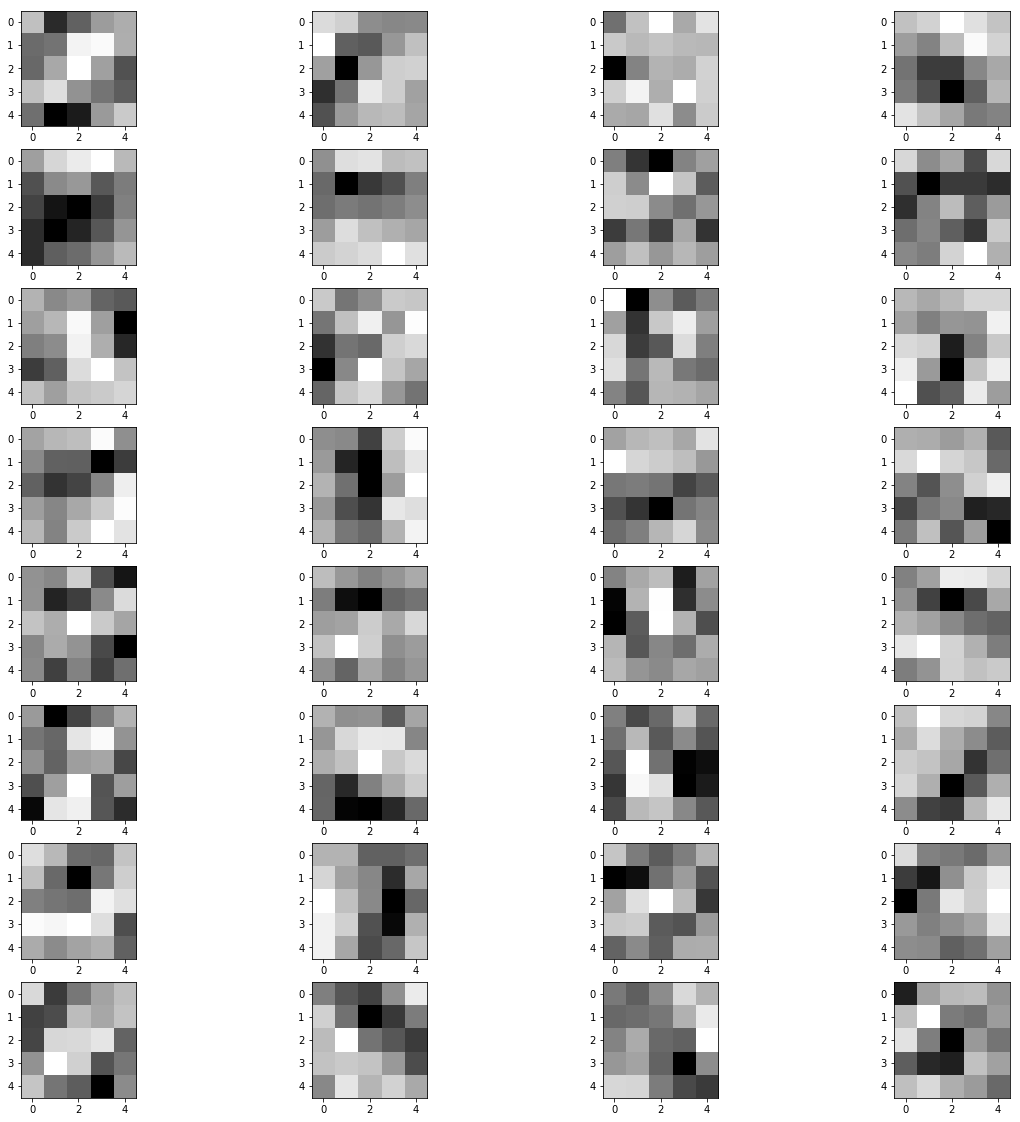

In [31]:
cols = 4
rows = 8
fig=plt.figure(figsize=(20, 20))

for channel in range(weights.shape[-1]):
    print(channel)
    w2=weights[:,:,:,channel].reshape((5,5))
    w2 *= 255
    print(w2)
    
    #fig=plt.figure(figsize=(8, 8))
    fig.add_subplot(rows, cols, channel+1)
    plt.imshow(w2, cmap="gray")

print("biases=", biases)

plt.show()
